<a href="https://colab.research.google.com/github/syedanida/Advanced-Dimensionality-Reduction/blob/main/Brain_Tumor_MRI_dimensionality_reduction_techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

100%|██████████| 149M/149M [00:01<00:00, 115MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/masoudnickparvar/brain-tumor-mri-dataset/versions/1


In [4]:
dataset_dir_train = os.path.join(path, "Training")
dataset_dir_test = os.path.join(path, "Testing")

In [5]:
def load_images_labels(data_dir):
    images = []
    labels = []
    for label in os.listdir(data_dir):
        label_path = os.path.join(data_dir, label)
        if os.path.isdir(label_path):
            for img_file in os.listdir(label_path):
                img_path = os.path.join(label_path, img_file)
                try:
                    # Load image, convert to grayscale, and resize
                    img = Image.open(img_path).convert('L').resize((64, 64))
                    images.append(np.array(img).flatten())  # Flatten the image
                    labels.append(label)  # Use folder name as label
                except Exception as e:
                    print(f"Error loading image {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load training data
X_train, y_train = load_images_labels(dataset_dir_train)

# Load testing data (if applicable)
X_test, y_test = load_images_labels(dataset_dir_test)


In [6]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (5712, 4096)
Testing data shape: (1311, 4096)


# Locally Linear Embedding (LLE)

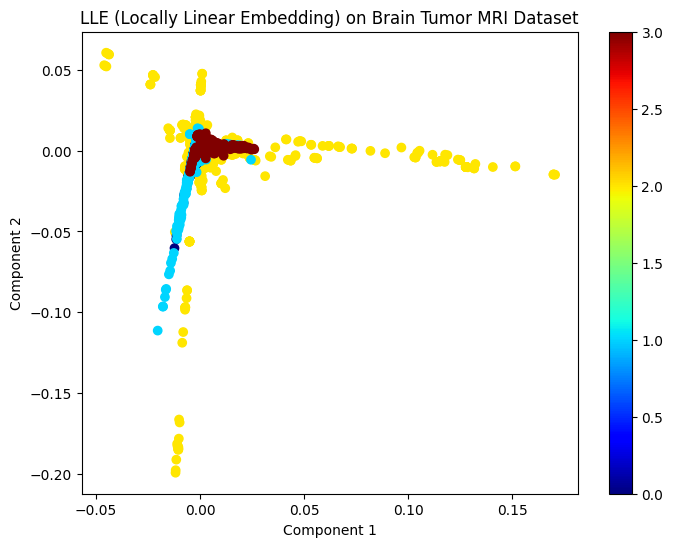

In [7]:
import matplotlib.pyplot as plt
from sklearn.manifold import LocallyLinearEmbedding
import numpy as np

# Applying LLE
lle = LocallyLinearEmbedding(n_neighbors=30, n_components=2)
X_lle = lle.fit_transform(X_train)

# Convert string labels to numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Plotting the LLE result
plt.figure(figsize=(8, 6))
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=y_train_encoded, cmap='jet') # Use encoded labels for color
plt.colorbar()
plt.title("LLE (Locally Linear Embedding) on Brain Tumor MRI Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# t-SNE (Interactive Visualization)

In [8]:
from sklearn.manifold import TSNE
import plotly.express as px

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Create interactive plot using plotly
fig = px.scatter(x=X_tsne[:, 0], y=X_tsne[:, 1], color=y_train, title="t-SNE on Brain Tumor MRI Dataset")
fig.show()

# ISOMAP

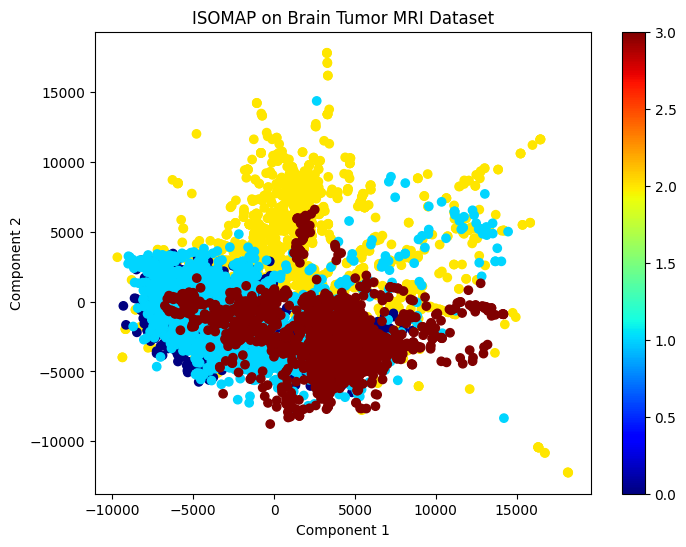

In [12]:
import matplotlib.pyplot as plt
from sklearn.manifold import Isomap
from sklearn.preprocessing import LabelEncoder
import warnings  # For suppressing warnings

# Suppress warnings
warnings.filterwarnings("ignore")

# Applying Isomap
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_train)

# Convert string labels to numerical values using LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)  # Encode y_train labels

# Plotting the Isomap result
plt.figure(figsize=(8, 6))
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y_train_encoded, cmap='jet')  # Use encoded labels for color
plt.colorbar()
plt.title("ISOMAP on Brain Tumor MRI Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

# UMAP (Interactive Visualization)

In [13]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.3 MB/s eta 0:00:00


In [14]:
import umap
import plotly.express as px

umap_model = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_train)

# Interactive visualization using plotly
fig = px.scatter(x=X_umap[:, 0], y=X_umap[:, 1], color=y_train, title="UMAP on Brain Tumor MRI Dataset")
fig.show()

# MDS (Multidimensional Scaling)

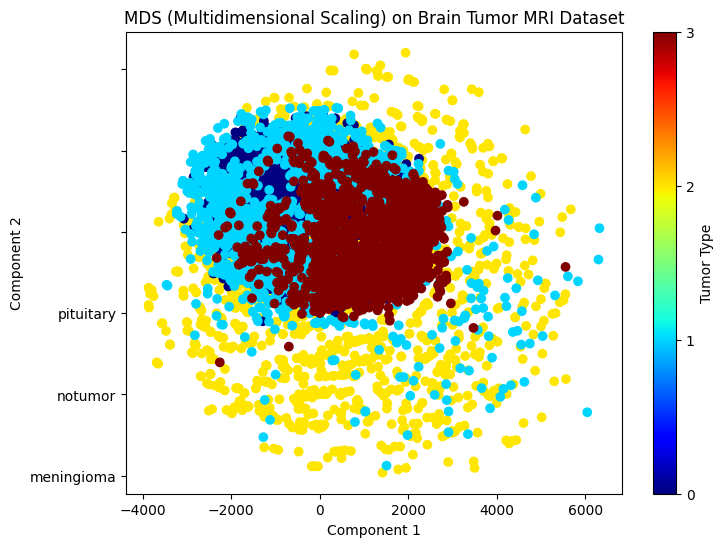

In [15]:
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
import numpy as np

# Applying MDS
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_train)

# Convert string labels to numerical values for color mapping
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_numeric = np.array([label_mapping[label] for label in y_train])

# Plotting the MDS result with numerical labels
plt.figure(figsize=(8, 6))
plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y_train_numeric, cmap='jet')
plt.colorbar(ticks=np.arange(len(unique_labels)), label='Tumor Type') # Add colorbar with labels
plt.title("MDS (Multidimensional Scaling) on Brain Tumor MRI Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Replace colorbar ticks with original labels
plt.gca().set_yticklabels(unique_labels) # Set y-axis tick labels

plt.show()

# Randomized PCA

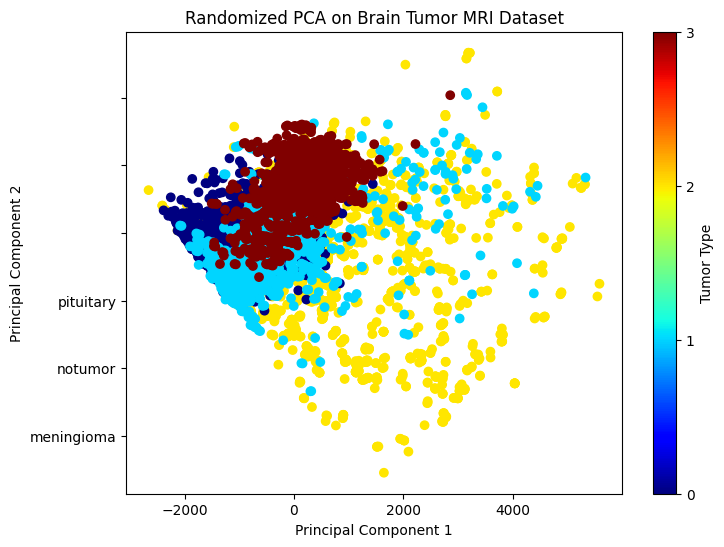

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

# Applying PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Convert string labels to numerical values for color mapping
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_numeric = np.array([label_mapping[label] for label in y_train])

# Plotting the PCA result with numerical labels
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train_numeric, cmap='jet') # Use numerical labels for color
plt.colorbar(ticks=np.arange(len(unique_labels)), label='Tumor Type') # Add colorbar with labels
plt.title("Randomized PCA on Brain Tumor MRI Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# Replace colorbar ticks with original labels
plt.gca().set_yticklabels(unique_labels) # Set y-axis tick labels

plt.show()

# Kernel PCA

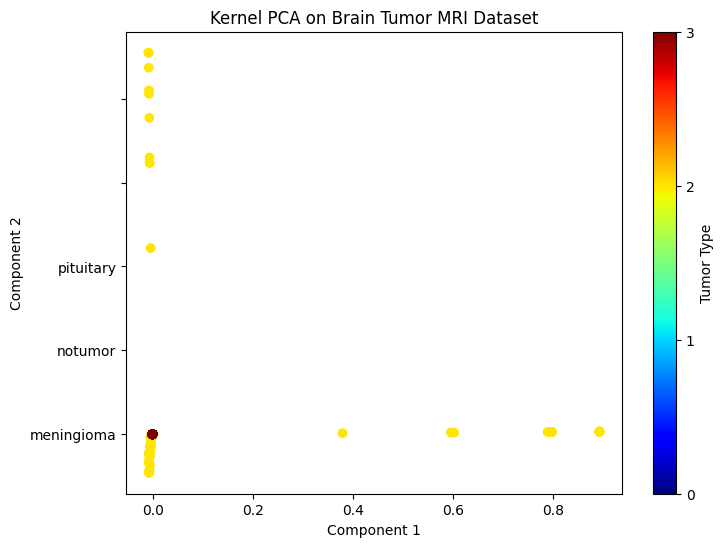

In [17]:
from sklearn.decomposition import KernelPCA
import matplotlib.pyplot as plt
import numpy as np

# Applying Kernel PCA
kernel_pca = KernelPCA(n_components=2, kernel='rbf')
X_kernel_pca = kernel_pca.fit_transform(X_train)

# Convert string labels to numerical values for color mapping
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_numeric = np.array([label_mapping[label] for label in y_train])

# Plotting the Kernel PCA result with numerical labels
plt.figure(figsize=(8, 6))
plt.scatter(X_kernel_pca[:, 0], X_kernel_pca[:, 1], c=y_train_numeric, cmap='jet') # Use numerical labels for color
plt.colorbar(ticks=np.arange(len(unique_labels)), label='Tumor Type') # Add colorbar with labels
plt.title("Kernel PCA on Brain Tumor MRI Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Replace colorbar ticks with original labels
plt.gca().set_yticklabels(unique_labels) # Set y-axis tick labels to original string labels

plt.show()

# Incremental PCA

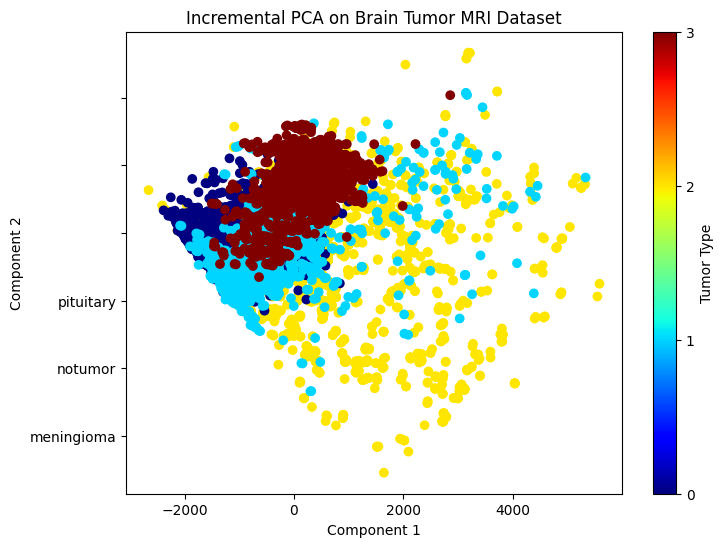

In [18]:
from sklearn.decomposition import IncrementalPCA
import matplotlib.pyplot as plt
import numpy as np

# Applying Incremental PCA
incremental_pca = IncrementalPCA(n_components=2)
X_incremental_pca = incremental_pca.fit_transform(X_train)

# Convert string labels to numerical values for color mapping
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_numeric = np.array([label_mapping[label] for label in y_train])

# Plotting the Incremental PCA result with numerical labels
plt.figure(figsize=(8, 6))
plt.scatter(X_incremental_pca[:, 0], X_incremental_pca[:, 1], c=y_train_numeric, cmap='jet') # Use numerical labels for color
plt.colorbar(ticks=np.arange(len(unique_labels)), label='Tumor Type') # Add colorbar with labels
plt.title("Incremental PCA on Brain Tumor MRI Dataset")
plt.xlabel("Component 1")
plt.ylabel("Component 2")

# Replace colorbar ticks with original labels
plt.gca().set_yticklabels(unique_labels) # Set y-axis tick labels to original string labels

plt.show()

# Factor Analysis

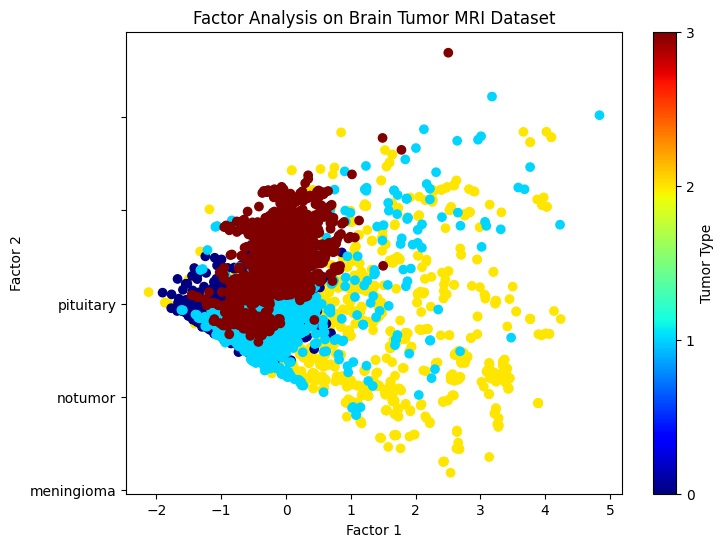

In [19]:
from sklearn.decomposition import FactorAnalysis
import matplotlib.pyplot as plt
import numpy as np

# Applying Factor Analysis
factor_analysis = FactorAnalysis(n_components=2)
X_factor_analysis = factor_analysis.fit_transform(X_train)

# Convert string labels to numerical values for color mapping
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_numeric = np.array([label_mapping[label] for label in y_train])

# Plotting the Factor Analysis result with numerical labels
plt.figure(figsize=(8, 6))
plt.scatter(X_factor_analysis[:, 0], X_factor_analysis[:, 1], c=y_train_numeric, cmap='jet') # Use numerical labels for color
plt.colorbar(ticks=np.arange(len(unique_labels)), label='Tumor Type') # Add colorbar with labels
plt.title("Factor Analysis on Brain Tumor MRI Dataset")
plt.xlabel("Factor 1")
plt.ylabel("Factor 2")

# Replace colorbar ticks with original labels
plt.gca().set_yticklabels(unique_labels) # Set y-axis tick labels to original string labels

plt.show()

# Autoencoders

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - loss: 4482.9268
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4545.3652
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4612.9277
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4613.4795
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4522.8389
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4582.9272
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4574.8779
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4529.2480
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4558.1182
Epoch 10/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4582.6455
Epoch 11/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4575.3462
Epoch 12/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4593.0532
Epoch 13/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4512.2935
Epoch 14/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4550.7720
Epoch 15/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 

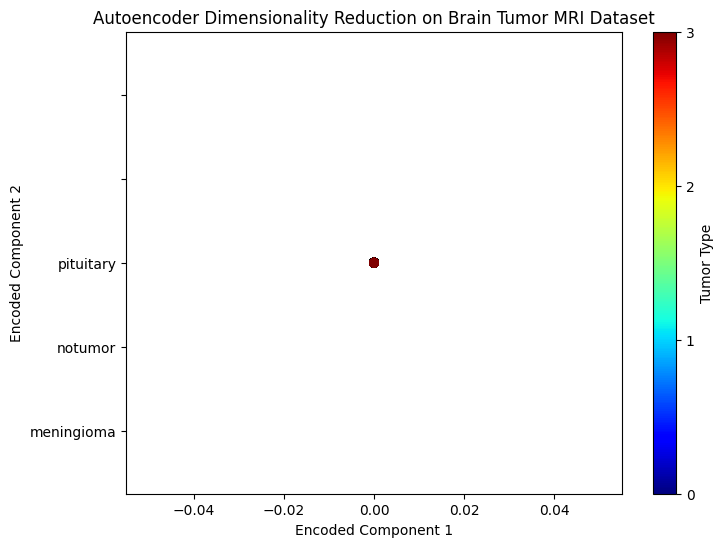

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Define Autoencoder architecture
input_img = layers.Input(shape=(X_train.shape[1],))
encoded = layers.Dense(128, activation='relu')(input_img)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(X_train.shape[1], activation='sigmoid')(decoded)

autoencoder = models.Model(input_img, decoded)

# Compile the Autoencoder model
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the Autoencoder model
autoencoder.fit(X_train, X_train, epochs=50, batch_size=256, shuffle=True)

# Encoder model to reduce dimensions
encoder = models.Model(input_img, encoded)
X_autoencoded = encoder.predict(X_train)

# Plotting the Autoencoder result
plt.figure(figsize=(8, 6))

# Convert string labels to numerical values for color mapping
unique_labels = np.unique(y_train)
label_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_numeric = np.array([label_mapping[label] for label in y_train])

# Use y_train_numeric for color mapping
plt.scatter(X_autoencoded[:, 0], X_autoencoded[:, 1], c=y_train_numeric, cmap='jet')

plt.colorbar(ticks=np.arange(len(unique_labels)), label='Tumor Type') # Add colorbar with labels

# Optionally, replace colorbar ticks with original labels
plt.gca().set_yticklabels(unique_labels)

plt.title("Autoencoder Dimensionality Reduction on Brain Tumor MRI Dataset")
plt.xlabel("Encoded Component 1")
plt.ylabel("Encoded Component 2")
plt.show()
